# Natural Language Processing

In [26]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
# Import the dataset
# Tab delimiting is the best practice when reading from text files
# No one inserts a tab when writing a review
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t') #\t means tab, quouting =3 ignores double quotes

In [34]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [35]:
data.Liked.unique() #Make sure there's no review under `Liked' column

array([1, 0], dtype=int64)

Under the 'Liked' column, we have 1s and 0s, respectively indicating whether a review is positive or negative.

### Stemming: combine similar words like 'loved' or 'lovely' together into one subgroup: 'love'

In [36]:
from nltk.stem.porter import PorterStemmer

In [49]:
PorterStemmer().stem('universe')

'univers'

In [50]:
PorterStemmer().stem('university')

'univers'

In [54]:
PorterStemmer().stem('tailor')

'tailor'

In [4]:
data['Review'][0]

'Wow... Loved this place.'

## Cleaning the texts

In [63]:
# Cleaning the texts

import re

review = re.sub('[^a-zA-Z^]',' ', data['Review'][0]) #Omits numbers and other characters, leaving only letters (for the 1st review)


In [64]:
review #Punctuation etc. is removed

'Wow    Loved this place '

In [65]:
review = review.lower() #All letters are made lowercase
review

'wow    loved this place '

In [66]:
import nltk
nltk.download('stopwords') # Download stopwords so irrelevant words won't affect our algorithm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berk_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# Problem here is, review is a string, not a list. So we need to split review into different words
# Quite easy:

review = review.split()
review

['wow', 'loved', 'this', 'place']

In [68]:
from nltk.corpus import stopwords
# review = [word for word in review if not word in set(stopwords.words('english'))] 
# obsolete
#omit designated stopwords from the review

In [71]:
stopwords.words('ENGLISH')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
review

['wow', 'loved', 'this', 'place']

## Stemming

In [ ]:
PorterStemmer().stem('universe')

In [72]:
# We just need the roots of the words, otherwise our algorithm would have problems
# Every word with a suffix would need its own columns
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

stops = set(stopwords.words('english'))

review = [ps.stem(word) for word in review if not word in stops] 
#in addition to omitting stopwords, we also take only roots of the words

In [13]:
review

['wow', 'love', 'place']

In [73]:
# Put our review back together into one single string
review = ' '.join(review)
review


'wow love place'

## Cleaning the whole dataset

In [74]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [184]:
%%time
# Let's apply what we've done so far for the first review to all reviews by using a for loop
# initialize a new list for our clean reviews
corpus = []
stops = set(stopwords.words('english'))
stops.remove('not')


for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z^]',' ', data['Review'][i])  # Remove punctuation
    review = review.lower()                               # Lowercase
    review = review.split()                               # Break down into lists
    review = [word for word in review if not word in stops]  # Clean stopwords and stemming
    review = [ps.stem(word) for word in review]  # Clean stopwords and stemming
    review = ' '.join(review)                             # Join on space
    corpus.append(review)                                 # Append to corpus

Wall time: 237 ms


In [185]:
pd.DataFrame({'Actual': data['Review'],
              'Clean': corpus,
              'Like': data['Liked']})


,Actual,Clean,Like
0,Wow... Loved this place.,wow love place,1
1,Crust is not good.,crust not good,0
2,Not tasty and the texture was just nasty.,not tasti textur nasti,0
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...,1
4,The selection on the menu was great and so wer...,select menu great price,1
...,...,...,...
995,I think food should have flavor and texture an...,think food flavor textur lack,0
996,Appetite instantly gone.,appetit instantli gone,0
997,Overall I was not impressed and would not go b...,overal not impress would not go back,0
998,"The whole experience was underwhelming, and I ...",whole experi underwhelm think go ninja sushi n...,0


### From here we are going to create a classification model<br> which classifies the reviews into the groups of 'Liked' or 'Disliked' by analyzing the words

## Creating the Bag of Words model

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
cvt = CountVectorizer(max_features=1500) # limiting the numbers of features to filter out irrelevant words  
# There is an option to preprocess the text within CountVectorizer
# However, preprocessing the data manually gives more flexibility, especially in the cases where one works with the webpages(html)

In [187]:
X = cvt.fit_transform(corpus).toarray()

In [188]:
data['Review'].shape

(1000,)

In [189]:
pd.DataFrame(X, columns=cvt.get_feature_names())

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
y = data.Liked.values

Now we will try to understand the relation between the words appeared in a review and the outcome.

## Classification

### Naive Bayes Classifier

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

metrics_compare = pd.DataFrame()

In [192]:
# Here we can use one of our previously used classification templates
# In this exapmle, we will use Naive Bayes classifier

# Splitting the dataset into Training Set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Feature Scaling
# we don't need to do feature scaling as we mostly have zeros and ones
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)'''

#Fitting the Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the results
y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_nb = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_nb)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

### Decision Tree Classifier

In [193]:
# Decision Tree
# Fitting model to the train set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm_decision_tree = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_decision_tree)


#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

### KNN

In [194]:
# KNN

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Fitting model to the train set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_knn)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

### Kernel SVM

In [195]:
#Kernel SVM

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Fitting model to the train set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',
                 degree = 4,     #ignored if selected any other kernel than poly
                 random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

cm_kersvm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_kersvm)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regression

In [196]:
# Logistic Regression
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Fitting Logistic Regression to the train set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

cm_log_reg = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_log_reg)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest

In [197]:
# Random Forest
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Fitting model to the train set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,
                                    criterion = 'entropy',
                                    random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_svm)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

### SVM

In [198]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Fitting model to the train set
from sklearn.svm import LinearSVC
classifier = LinearSVC(
                random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_svm)

#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### CART

In [199]:
# CART
# Fitting model to the train set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',
                                    random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm_decision_tree = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm_decision_tree)


#Other metrics
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = pd.Series([acc_score,prec_score,rec_score,f1] , name = str(classifier.__class__.__name__))

metrics_compare = metrics_compare.append(metrics)

In [204]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [206]:
cross_validate(classifier, X_train, y_train, cv=3,
               scoring=make_scorer(precision_score)
              )

{'fit_time': array([0.11093712, 0.11596012, 0.09794426]),
 'score_time': array([0.00399661, 0.00299859, 0.00199938]),
 'test_score': array([0.77310924, 0.74590164, 0.78448276])}

In [217]:
sc_X = StandardScaler()
X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.fit_transform(X_test)
pd.concat([pd.DataFrame(cross_validate(classifier, X_trains, y_train, cv=3,
               scoring=['precision', 'recall', 'f1', 'accuracy']
              )).mean().rename(classifier.__class__.__name__)
           for classifier in [RandomForestClassifier(n_estimators=100),
                              GaussianNB(),
                              DecisionTreeClassifier(),
                              LogisticRegression(solver='lbfgs'),
                              SVC(kernel='rbf', gamma='auto'),
                              LinearSVC(),
                              KNeighborsClassifier(n_neighbors=9)]], axis=1)

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,RandomForestClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression,SVC,LinearSVC,KNeighborsClassifier
fit_time,0.569745,0.026324,0.098297,0.061854,0.530674,0.888386,0.027021
score_time,0.092955,0.065245,0.011002,0.007333,1.021014,0.007334,1.656874
test_precision,0.828296,0.632678,0.781898,0.765212,0.613583,0.724575,0.667926
test_recall,0.698413,0.764550,0.746032,0.801587,0.722222,0.642857,0.462963
test_f1,0.757158,0.691355,0.763405,0.782548,0.663275,0.680819,0.460729
test_accuracy,0.774667,0.657333,0.766667,0.776000,0.630667,0.697333,0.568000


In [200]:
metrics_compare = metrics_compare.rename(columns= {0: 'Accuracy Score',1: 'Precision Score',2: 'Recall Score',3: 'F1 Score'})

In [201]:
metrics_compare.transpose()[['SVC', 'GaussianNB', 'LinearSVC', 'RandomForestClassifier']]

,SVC,GaussianNB,LinearSVC,RandomForestClassifier
Accuracy Score,0.696000,0.680000,0.712000,0.748000
Precision Score,0.627778,0.626506,0.715517,0.797980
Recall Score,0.926230,0.852459,0.680328,0.647541
F1 Score,0.748344,0.722222,0.697479,0.714932


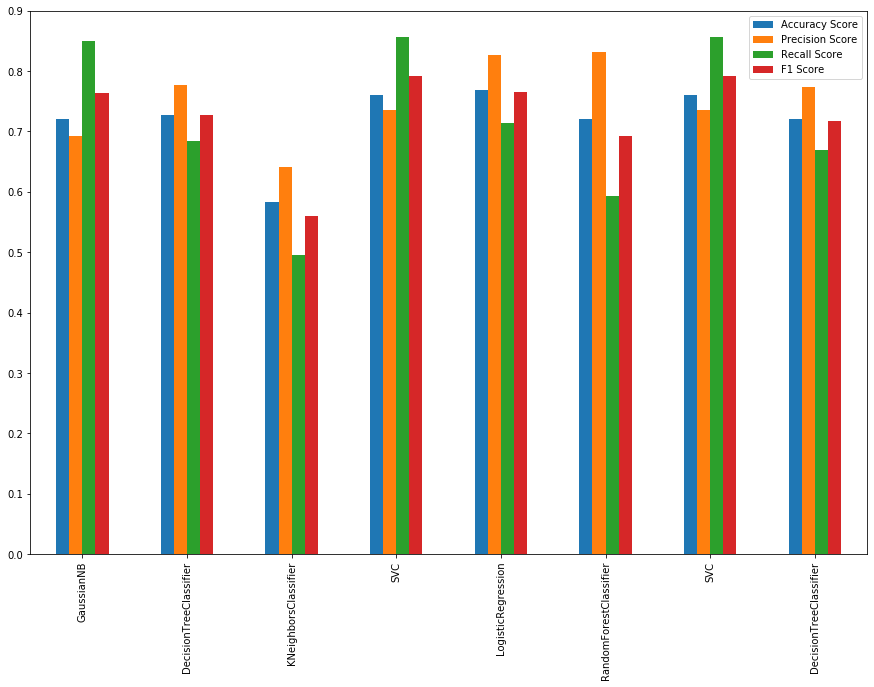

In [142]:
metrics_compare.plot(kind='bar', figsize=[15,10])